# CIFAR 10 experiments

In [ ]:
from cifar_tf_adv import network
from cifar_tf_common import *

import os
import numpy as np
import pickle
import gzip
import random
import tensorflow as tf
from tensorflow.python.ops import variables
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

tf.app.flags.DEFINE_string('f', '', 'kernel')
nw = network()

restoring from output/model.ckpt
INFO:tensorflow:Restoring parameters from output/model.ckpt


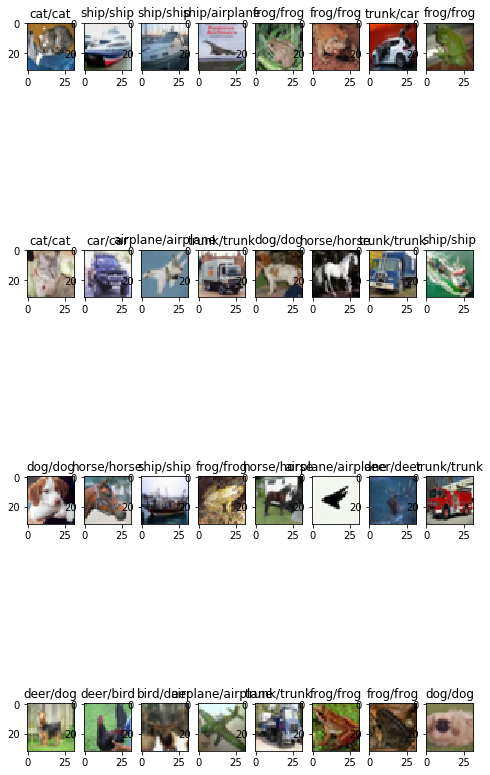

In [2]:
with tf.Session() as sess:
    test_data, visual = format_test_data(EPOCHS, BATCH_SIZE, 10000)
    isTrain = tf.placeholder(tf.bool, shape=())
    iterator = test_data.make_one_shot_iterator()
    next_element = iterator.get_next()

    logits = nw.inference(next_element[0], isTrain)
    prediction = tf.argmax(logits, 1)
    label = tf.argmax(next_element[1], 1)
    equality = tf.equal(prediction, tf.argmax(next_element[1], 1))
    accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    ckpt = tf.train.get_checkpoint_state(FLAGS.train_dir)
    if ckpt and ckpt.model_checkpoint_path:
        # Restores from checkpoint
        print('restoring from', ckpt.model_checkpoint_path)
        saver.restore(sess, ckpt.model_checkpoint_path)

    n=4
    m=8
    viterator = visual.make_one_shot_iterator()
    
    acc, lgts, pred, actual = sess.run([accuracy, logits, prediction, label], feed_dict={isTrain:False})
    fig = plt.figure(0, figsize=[2*n, m*2])
    for framen in range(n):
        for framem in range(m):
            a = fig.add_subplot(n,m,framen*m + framem + 1)
            item = viterator.get_next()
            p = sess.run(item)
            plt.imshow(p.astype(int))
            labelp= find_label(pred[framen*m + framem])
            labela= find_label(actual[framen*m + framem])
            a.set_title(labelp + '/' + labela)